In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

regular_data = pd.read_csv('regular_games.tsv', sep='\t')
tourney_data = pd.read_csv('tourney_games.tsv', sep='\t')

print(regular_data.keys())

Index(['class', 'eFG%', 'opp_eFG%', 'TO%', 'opp_TO%', 'OR%', 'opp_OR%', 'DR%',
       'opp_DR%', 'FTR', 'opp_FTR', '_eFG%', '_opp_eFG%', '_TO%', '_opp_TO%',
       '_OR%', '_opp_OR%', '_DR%', '_opp_DR%', '_FTR', '_opp_FTR', 'season'],
      dtype='object')


## Rebound % Difference Empirical Probability of Victory

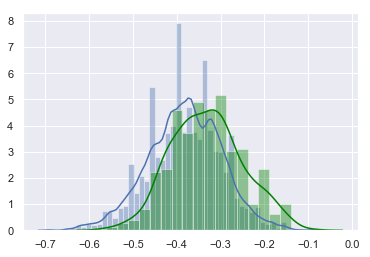

In [3]:
def get_differences(data):
    differences = []
    for i, game in data.iterrows():
        d = game['OR%'] - game['opp_DR%']
        differences.append(round(d, 2))
    return differences

regular_differences = get_differences(regular_data)
tourney_differences = get_differences(tourney_data)

sns.distplot(regular_differences)
sns.distplot(tourney_differences, color='green')

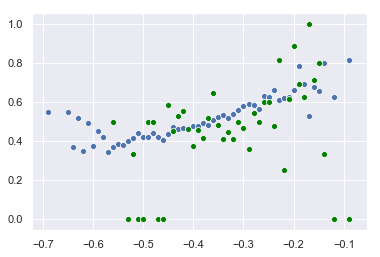

In [4]:
import numpy as np
from math import nan

plt.clf()

win_map = ['loss', 'win']

def get_probs_and_diffs(differences, data):
    probs = []
    diffs = []
    for v in sorted(set(differences)):
        examples = []
        for position, value in enumerate(differences):
            if value == v:
                examples.append(data.iloc[position]['class'])
        diffs.append(v)
        probs.append(np.mean(examples))
    return probs, diffs

tourney_probs, tourney_diffs = get_probs_and_diffs(tourney_differences, tourney_data)
regular_probs, regular_diffs = get_probs_and_diffs(regular_differences, regular_data)

sns.scatterplot(x=regular_diffs, y=regular_probs)
sns.scatterplot(x=tourney_diffs, y=tourney_probs, color='green')

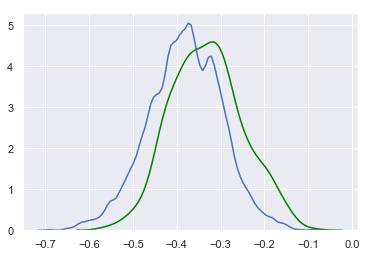

In [5]:
sns.kdeplot(regular_differences)
sns.kdeplot(tourney_differences, color='green')

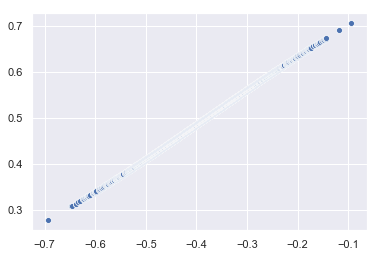

In [6]:
from sklearn.linear_model import LogisticRegression

regular_data['OR%diff'] = regular_data['OR%'] - regular_data['opp_DR%']         

#X = regular_data[['OR%', '_OR%']]
X = regular_data['OR%diff'].values.reshape(-1, 1)

y = regular_data['class']
clf = LogisticRegression(solver='lbfgs').fit(X, y)

probs = []
diffs = []
for diff in sorted(set(regular_data['OR%diff'].values)):
    probs.append(clf.predict_proba([[diff],])[0][1])
    diffs.append(diff)
    #print(f'{diff} {clf.predict_proba([[diff],])[0][1]}')
    
sns.scatterplot(x=diffs, y=probs)

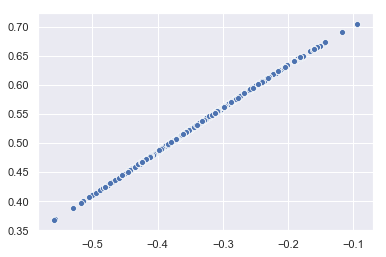

In [9]:
tourney_data['OR%diff'] = tourney_data['OR%'] - tourney_data['opp_DR%'] 

probs = []
diffs = []
for diff in tourney_data['OR%diff'].values:
    probs.append(clf.predict_proba([[diff],])[0][1])
    diffs.append(diff)
    
sns.scatterplot(x=diffs, y=probs)